In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

In [105]:
data=pd.read_csv("/content/train_loan_preprocess.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [106]:
data.Dependents.nunique()

4

In [107]:
data.shape

(614, 13)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [109]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [110]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [111]:
data.drop(columns=['CoapplicantIncome'], inplace=True)
data.isna().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [112]:
import matplotlib.pyplot as plt

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

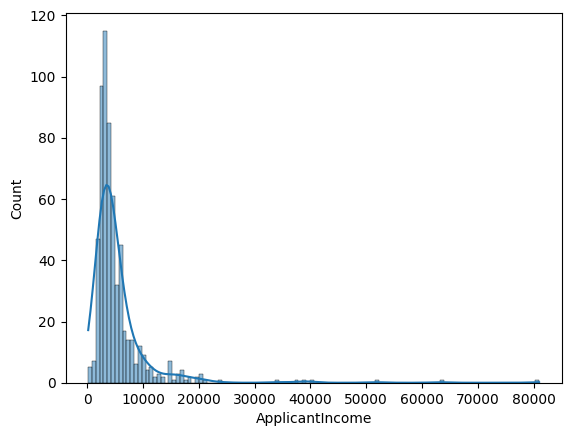

In [113]:
sns.histplot(data['ApplicantIncome'],kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

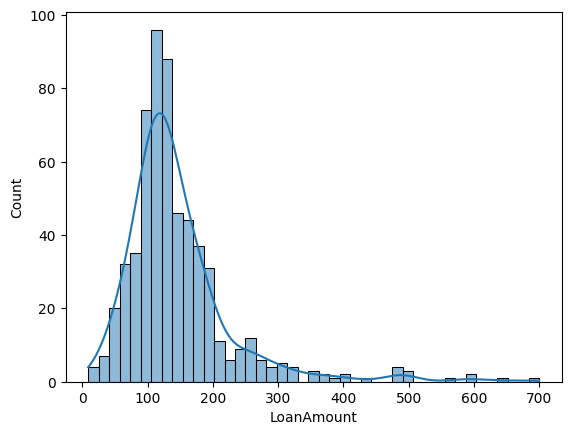

In [114]:
sns.histplot(data['LoanAmount'],kde=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

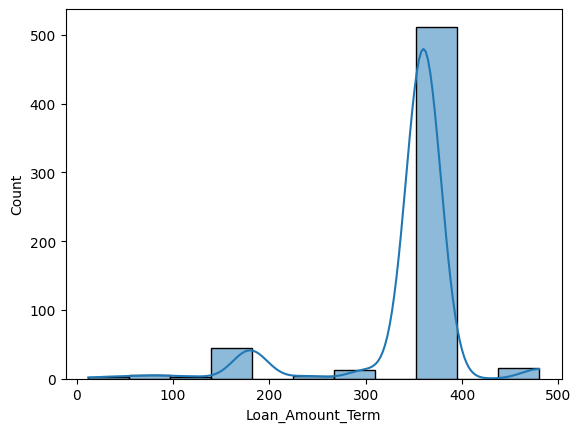

In [115]:
sns.histplot(data['Loan_Amount_Term'],kde=True)

<Axes: xlabel='Credit_History', ylabel='Count'>

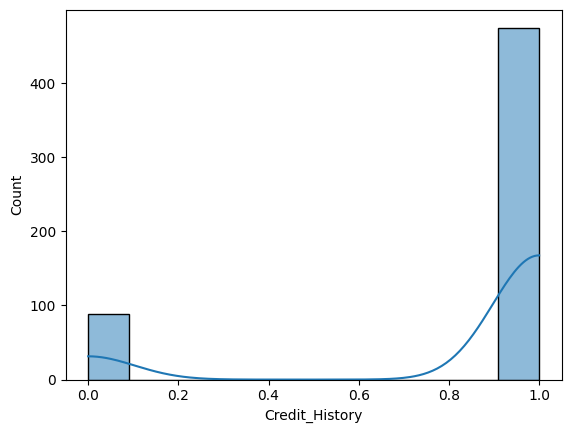

In [116]:
sns.histplot(data['Credit_History'],kde=True)

In [117]:
data.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [118]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)
data.isna().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'Loan_Amount_Term'}>,
        <Axes: title={'center': 'Credit_History'}>]], dtype=object)

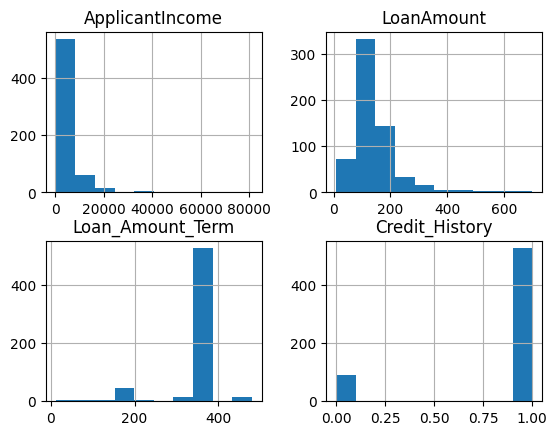

In [119]:
data.hist()

In [120]:
columns_to_change=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

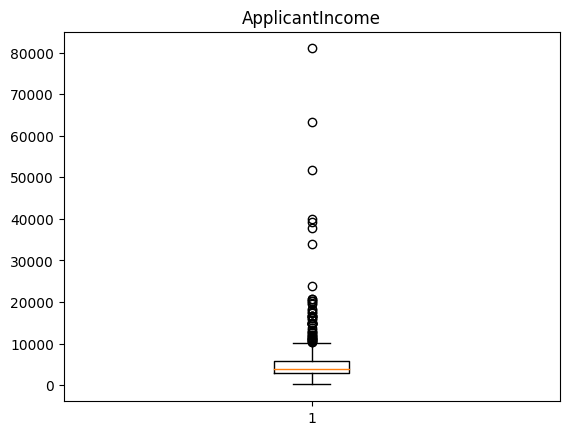

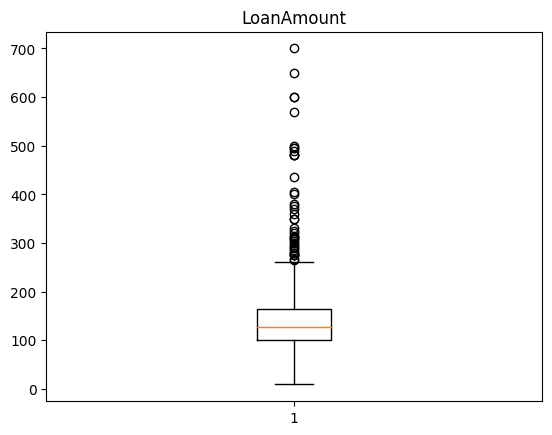

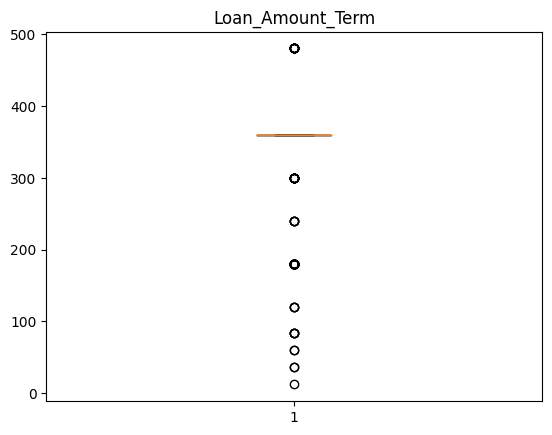

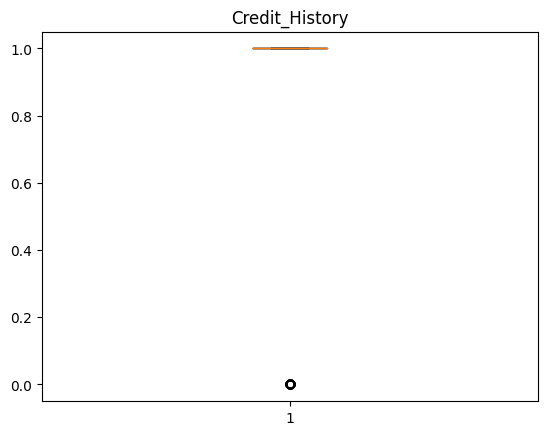

In [121]:
for col in columns_to_change:
    plt.figure()
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

In [122]:
Q1=np.percentile(data['ApplicantIncome'],25,interpolation='midpoint')
Q2=np.percentile(data['ApplicantIncome'],55,interpolation='midpoint')
Q3=np.percentile(data['ApplicantIncome'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

2879.0 4074.0 5790.0


In [123]:
IQR=Q3-Q1
IQR

2911.0

In [124]:
min_value=Q1-1.5*IQR
max_value=Q3+1.5*IQR
print(min_value,max_value)

-1487.5 10156.5


In [125]:
outliers=[]
for x in data['ApplicantIncome']:
  if((x>max_value) or (x<min_value)):
    outliers.append(x)
outliers

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

In [126]:
Q1=np.percentile(data['LoanAmount'],25,interpolation='midpoint')
Q2=np.percentile(data['LoanAmount'],55,interpolation='midpoint')
Q3=np.percentile(data['LoanAmount'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

100.5 130.0 164.5


In [127]:
IQR=Q3-Q1
IQR

64.0

In [128]:
min_value=Q1-1.5*IQR
max_value=Q3+1.5*IQR
print(min_value,max_value)

4.5 260.5


In [129]:
outliers=[]
for x in data['LoanAmount']:
  if((x>max_value) or (x<min_value)):
    outliers.append(x)
outliers

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [130]:
Q1=np.percentile(data['Loan_Amount_Term'],25,interpolation='midpoint')
Q2=np.percentile(data['Loan_Amount_Term'],55,interpolation='midpoint')
Q3=np.percentile(data['Loan_Amount_Term'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

360.0 360.0 360.0


In [131]:
IQR=Q3-Q1
IQR

0.0

In [132]:
min_value=Q1-1.5*IQR
max_value=Q3+1.5*IQR
print(min_value,max_value)

360.0 360.0


In [133]:
outliers=[]
for x in data['Loan_Amount_Term']:
  if((x>max_value) or (x<min_value)):
    outliers.append(x)
outliers

[120.0,
 240.0,
 180.0,
 180.0,
 60.0,
 300.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 180.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 480.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 180.0,
 240.0,
 300.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0,
 180.0]

In [134]:
Q1=np.percentile(data['Credit_History'],25,interpolation='midpoint')
Q2=np.percentile(data['Credit_History'],55,interpolation='midpoint')
Q3=np.percentile(data['Credit_History'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

1.0 1.0 1.0


In [135]:
IQR=Q3-Q1
IQR

0.0

In [136]:
min_value=Q1-1.5*IQR
max_value=Q3+1.5*IQR
print(min_value,max_value)

1.0 1.0


In [137]:
outliers=[]
for x in data['Credit_History']:
  if((x>max_value) or (x<min_value)):
    outliers.append(x)
outliers

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [146]:
categorical_cols=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
numerical_cols=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [156]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
data['Gender'] = data['Gender'].astype(str)

In [157]:
label_encoder= LabelEncoder()
data['Gender_encoded']=label_encoder.fit_transform(data['Gender'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_encoded
0,LP001002,Male,No,0,Graduate,No,5849,128.0,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y,1
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y,1
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y,1


In [158]:
data['Gender_encoded'].value_counts()

Gender_encoded
1    502
0    112
Name: count, dtype: int64

In [160]:
columns_to_convert = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
data[columns_to_convert] = data[columns_to_convert].astype(str)

In [161]:
label_encoder = LabelEncoder()

for column in columns_to_convert:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])

print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               5849       128.0             360.0             1.

In [163]:
data["Gender_encoded"].value_counts()

Gender_encoded
1    502
0    112
Name: count, dtype: int64

In [164]:
from sklearn.preprocessing import StandardScaler

In [166]:
data_sts_scaled=data.copy()

std_scaler=StandardScaler()
data_sts_scaled[numerical_cols]=std_scaler.fit_transform(data_sts_scaled[numerical_cols])
data_sts_scaled.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_encoded,Married_encoded,Dependents_encoded,Education_encoded,Self_Employed_encoded,Property_Area_encoded,Loan_Status_encoded
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.211241,0.273231,0.411733,Urban,Y,1,0,0,0,0,2,1
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.211241,0.273231,0.411733,Rural,N,1,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.948996,0.273231,0.411733,Urban,Y,1,1,0,0,1,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,-0.306435,0.273231,0.411733,Urban,Y,1,1,0,1,0,2,1
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.056551,0.273231,0.411733,Urban,Y,1,0,0,0,0,2,1


In [167]:
data_minmax_scaled=data.copy()

minmax_scaler=MinMaxScaler()
data_minmax_scaled[numerical_cols]=std_scaler.fit_transform(data_minmax_scaled[numerical_cols])
data_minmax_scaled.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_encoded,Married_encoded,Dependents_encoded,Education_encoded,Self_Employed_encoded,Property_Area_encoded,Loan_Status_encoded
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.211241,0.273231,0.411733,Urban,Y,1,0,0,0,0,2,1
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.211241,0.273231,0.411733,Rural,N,1,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.948996,0.273231,0.411733,Urban,Y,1,1,0,0,1,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,-0.306435,0.273231,0.411733,Urban,Y,1,1,0,1,0,2,1
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.056551,0.273231,0.411733,Urban,Y,1,0,0,0,0,2,1


In [168]:
data_minmax_scaled.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_encoded,Married_encoded,Dependents_encoded,Education_encoded,Self_Employed_encoded,Property_Area_encoded,Loan_Status_encoded
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-4.339634e-18,-2.603780e-17,5.930833e-17,-1.620130e-16,0.817590,0.653094,0.744300,0.218241,0.133550,1.037459,0.687296
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.386497,0.476373,1.009623,0.413389,0.340446,0.787482,0.463973
min,-8.606493e-01,-1.627255e+00,-5.132498e+00,-2.428760e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.138159e-01,-5.414462e-01,2.732313e-01,4.117327e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.606393e-01,-2.112412e-01,2.732313e-01,4.117327e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,6.414426e-02,2.260572e-01,2.732313e-01,4.117327e-01,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,1.238462e+01,6.595146e+00,2.137276e+00,4.117327e-01,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000


In [170]:
corr_colunmns=[
       'ApplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
original_data_corr=data[corr_colunmns].corr()
original_data_corr

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,0.565181,-0.046531,-0.018615
LoanAmount,0.565181,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,0.036960,1.000000,-0.004705
Credit_History,-0.018615,-0.000607,-0.004705,1.000000


<Axes: >

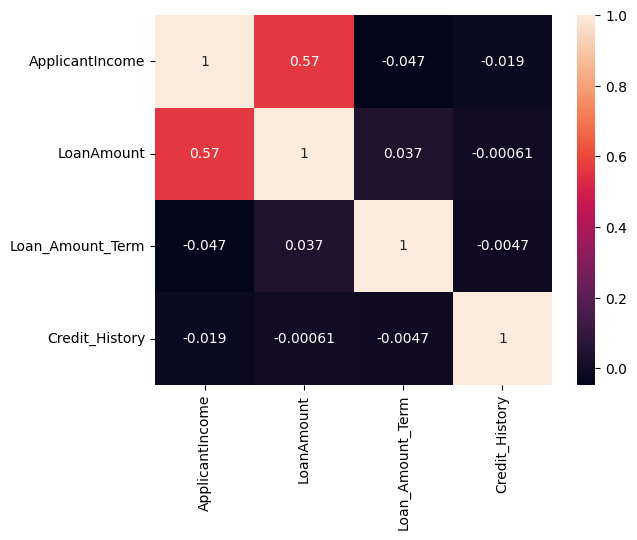

In [171]:
import seaborn as sns
sns.heatmap(original_data_corr,annot=True)